The full repository containing all files is on github: https://github.com/EggmanWalrus/40400-Assignment-2

# Research Question

How does the tolerance of inequality vary across the world? What factors contribute to this
cultural phenomenon?

# Data Source

The [World Values Survey](www.worldvaluessurvey.org), which started in 1981, consists of nationally representative 
surveys conducted in almost 100 countries which contain almost 90 percent of the world’s population, using a common 
questionnaire. It is the largest non-commercial, cross-national, time series investigation of human beliefs and values 
ever executed, currently including interviews with almost 400,000 respondents and covering all of the world's major 
cultural zones.

Data used in this project is from WVS Wave 6 (2010-2014). I included all 59 countries  for analysis. Raw data files are stored in this 
[folder](Data_raw).

# Data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from scipy import stats
import pycountry
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Run Python script
%run -i tidying.py

display(WVS)

,CountryRegion,Family,Friends,Leisure,Politics,Work,Religion,Happiness,Health,Satisfaction,...,Confidence_govern,Confidence_parties,Democracy_state_income_equal,Democracy_importance,Democracy_reality,Human_rights,Social_class,Income_scale,Sex,Age
0,Sweden,1,1,1,3,1,2,2,1,8,...,1,2,1,10,9,2,3,5,2,38
1,Sweden,1,2,3,3,2,2,2,2,5,...,3,3,1,10,8,3,2,5,2,51
2,Sweden,1,1,2,3,2,4,1,2,8,...,2,3,1,8,8,2,2,7,1,70
3,Sweden,1,1,2,3,2,3,2,3,5,...,4,4,5,6,6,3,3,6,2,21
4,Sweden,1,1,1,2,2,3,1,1,9,...,2,2,1,10,8,2,3,5,2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88560,Georgia,1,2,1,2,1,1,2,2,7,...,2,3,7,10,7,2,3,5,1,45
88561,Georgia,1,1,1,1,1,1,2,1,10,...,2,3,10,10,10,2,3,1,1,36
88562,Georgia,1,1,2,2,1,1,1,1,7,...,4,4,7,10,5,1,2,1,2,33
88563,Georgia,1,1,4,1,1,1,2,3,10,...,4,4,1,10,7,2,5,2,1,37


In [3]:
# Filter out certain values, group by countries and regions, and calculate average values
WVS_mean = WVS[(WVS['Income_equality'] > 0) & (WVS['Wealth_accumulation'] > 0) & (WVS['Competition'] > 0)].groupby('CountryRegion').mean()
WVS_mean = WVS_mean[['Income_equality', 'Wealth_accumulation', 'Competition']]

# Convert country name to country iso3 code
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in WVS_mean.index]
WVS_mean['ISO3'] = codes

display(WVS_mean.head())

,Income_equality,Wealth_accumulation,Competition,ISO3
CountryRegion,,,,
Algeria,6.585839,5.605238,3.483996,DZA
Argentina,4.749730,5.910464,4.721683,ARG
Armenia,5.766802,6.337067,3.364562,ARM
Australia,4.735928,6.185546,3.257818,AUS
Azerbaijan,5.884116,7.043956,4.279720,AZE


# Semiotics

Tolerance of income inequality is measured by the answers to question V96. 

1 means the respondent completely agrees with the statement: income should be made more equal. 

10 means the respondent completely agrees with the statement: we need larger income differences as incentives for individual effort.

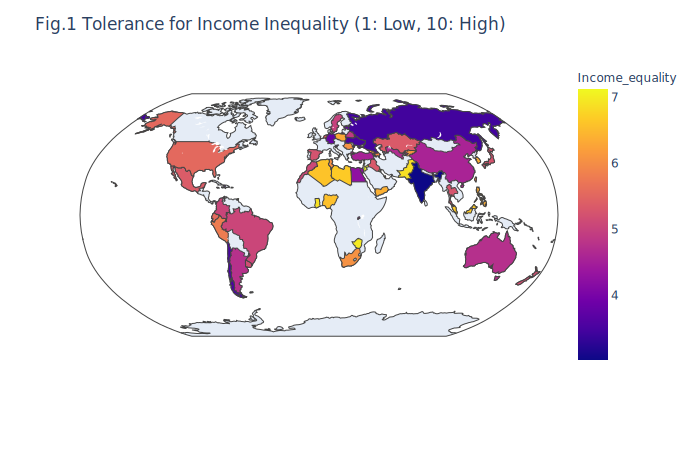

In [4]:
fig = px.choropleth(WVS_mean, locations="ISO3", color="Income_equality", projection = 'robinson')

fig.update_layout(title = 'Fig.1 Tolerance for Income Inequality (1: Low, 10: High)')

fig.show('svg')

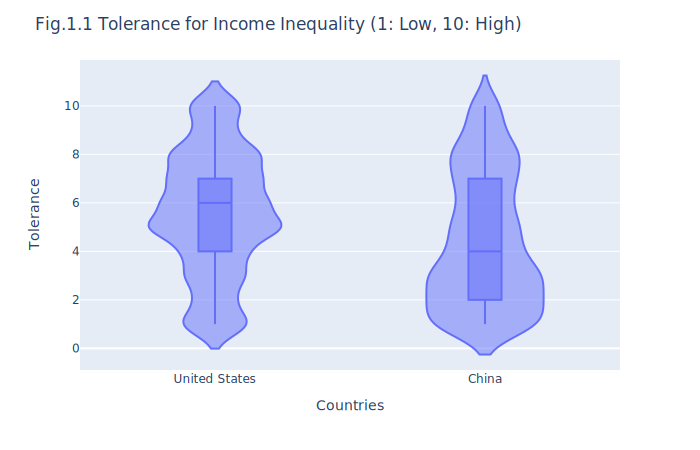

In [5]:
fig = px.violin(WVS[((WVS['CountryRegion'] == 'China') |
                   (WVS['CountryRegion'] == 'United States')) &
                   (WVS['Income_equality'] > 0)],
                x = 'CountryRegion',
                y = 'Income_equality',
                box = True)

fig.update_layout(title = 'Fig.1.1 Tolerance for Income Inequality (1: Low, 10: High)',
                  xaxis = dict(title = 'Countries'),
                  yaxis = dict(title = 'Tolerance'))

fig.show('svg')

Attitude towards wealth accumulation is measured by the answers to question V101. 

1 means the respondent completely agrees with the statement: people can only get rich at the expense of others.

10 means the respondent completely agrees with the statement: weath can grow so there's enough of everyone.

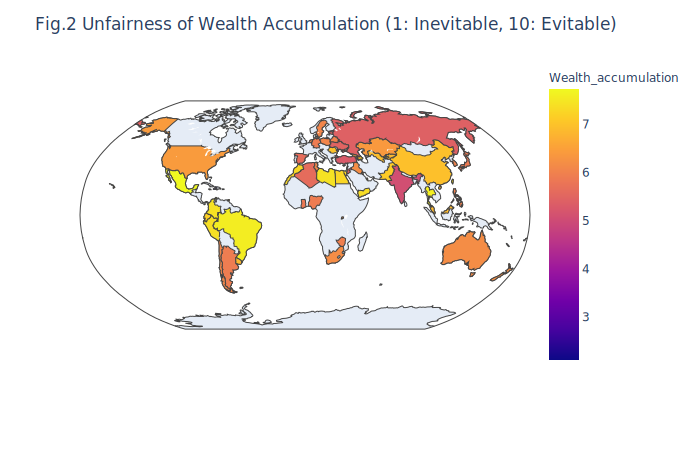

In [6]:
fig = px.choropleth(WVS_mean, locations="ISO3", color="Wealth_accumulation", projection = 'robinson')

fig.update_layout(title = 'Fig.2 Unfairness of Wealth Accumulation (1: Inevitable, 10: Evitable)')

fig.show('svg')

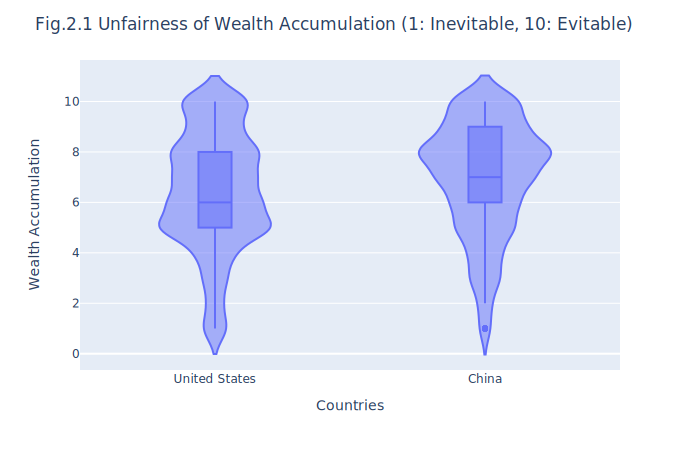

In [7]:
fig = px.violin(WVS[((WVS['CountryRegion'] == 'China') |
                   (WVS['CountryRegion'] == 'United States')) &
                   (WVS['Wealth_accumulation'] > 0)],
                x = 'CountryRegion',
                y = 'Wealth_accumulation',
                box = True)

fig.update_layout(title = 'Fig.2.1 Unfairness of Wealth Accumulation (1: Inevitable, 10: Evitable)',
                  xaxis = dict(title = 'Countries'),
                  yaxis = dict(title = 'Wealth Accumulation'))

fig.show('svg')

Perception of competition is measured by the answers to question V99. 

1 means the respondent completely agrees with the statement: competition is good as it stimulates people to work hard and develop new ideas.

10 means the respondent completely agrees with the statement: competition is harmful as it brings out the worst in people.

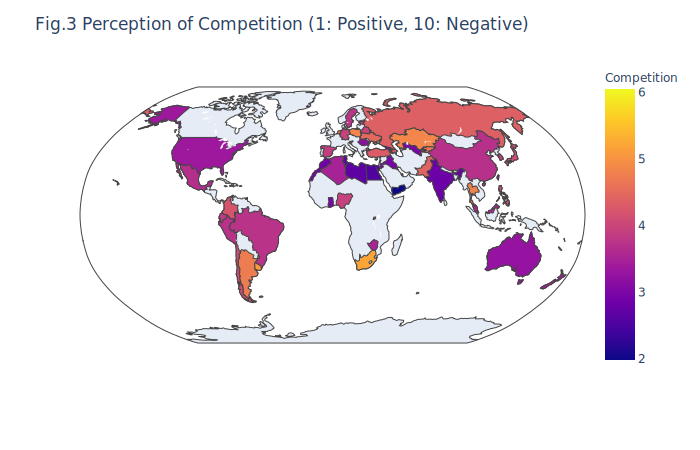

In [8]:
fig = px.choropleth(WVS_mean, locations="ISO3", color="Competition", projection = 'robinson')

fig.update_layout(title = 'Fig.3 Perception of Competition (1: Positive, 10: Negative)')

fig.show('svg')

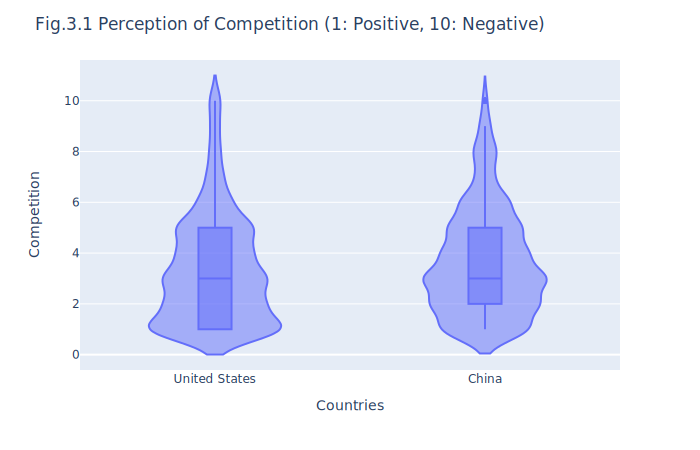

In [9]:
fig = px.violin(WVS[((WVS['CountryRegion'] == 'China') |
                   (WVS['CountryRegion'] == 'United States')) &
                   (WVS['Competition'] > 0)],
                x = 'CountryRegion',
                y = 'Competition',
                box = True)

fig.update_layout(title = 'Fig.3.1 Perception of Competition (1: Positive, 10: Negative)',
                  xaxis = dict(title = 'Countries'),
                  yaxis = dict(title = 'Competition'))

fig.show('svg')

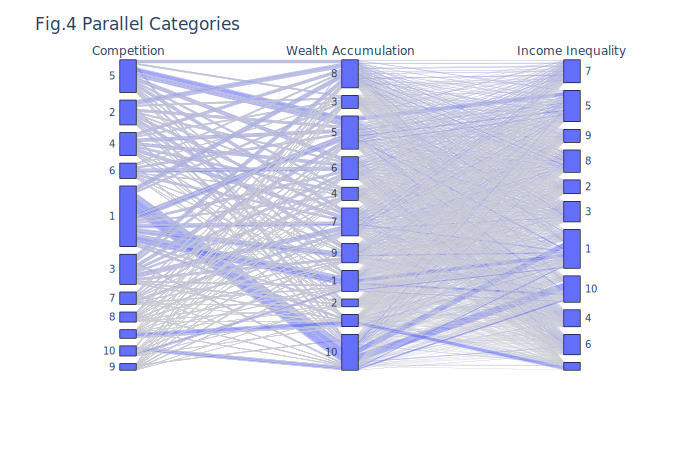

In [10]:
subset_columns = ['Competition', 'Wealth_accumulation', 'Income_equality']

fig = px.parallel_categories(
    WVS[subset_columns][WVS[subset_columns]>0 &
    (~WVS[subset_columns].isnull())],
    labels = {'Wealth_accumulation': 'Wealth Accumulation', 'Income_equality': 'Income Inequality'}
)

fig.update_layout(title = 'Fig.4 Parallel Categories')

fig.show('svg')

In [11]:
df_corr = pd.DataFrame() # Correlation matrix
df_p = pd.DataFrame()

for x in subset_columns:
    for y in subset_columns:
        corr = stats.pearsonr(WVS[x], WVS[y])
        df_corr.loc[x, y] = corr[0]
        df_p.loc[x, y] = corr[1]

df_p

,Competition,Wealth_accumulation,Income_equality
Competition,0.000000e+00,2.981103e-49,7.116866e-143
Wealth_accumulation,2.981103e-49,0.000000e+00,0.000000e+00
Income_equality,7.116866e-143,0.000000e+00,0.000000e+00


# Explanations and Next Steps

## Explanations

Despite the fact that social inequality and injustice is a hotspot of sociological studies, most scholars, particularly those in the field of social welfare, viewed inequality as purely negative and applied a social justice approach to eliminate injustice. This approach is represented by Dr. King's quote: "injustice anywhere is a threat to justice everywhere." However, here I argue that such an approach is unhelpful largely due to its over-idealization and over-simplification of social, economic, political, and cultural conditions. In reality, people often have some degree of tolerance towards inequality. Therefore, it is of most importance to study the perception of social inequality in various contexts such as individual-level characteristics, economy, politics, and culture, so as to predict whether the social volcano will erupt.

Recently, some studies started to utilize survey methods to provide theoretical explanations to such tolerance. Hirschman (1973) introduced the “tunnel effects” which describes the initial tolerance of increased inequality resulting from uneven economic growth processes on the part of relatively disadvantaged members of society, who, expecting to catch up and benefit in the near future, drew gratification from the improved income situation of others. Schroder (2016) pointed out that people adapt how much income inequality they tolerate to actual inequality. Shariff, Wiwad and Akinin (2016) showed that perceptions of higher mobility directly affect attitudes toward inequality. Nevertheless, the existing studies focused more on the macro-level conditions, leaving a blank for individual-level characteristics and their actions in result.

Therefore, for this pilot study, I performed the above analyses and generated some basic plots to describe various perceptions of inequality and distributional injustice in 59 countries across the world. Specifically, I looked at tolerance of income inequality, fairness of wealth accumulation, and perception of competition, as the three primary replicas from a common legisign. In addition, I picked out United States and China for comparison.

The three replicas belong to **dicent indexical sinsigns**, measured by the scale 1-10. They indicated the same object: tolerance of inequality, with the scale 1-10 as the sign vehicle, and the interpretant as people's attitudes towards inequality. Since the scale 1-10 is directly determined and affected by the object, I will treat it as indexical. It is also dicent in such a way that the proposition indicates some actions of validation: "1 means high perception of competition." In summary, the three replicas I chose are dicent indexical sinsigns.

All three figures clearly demonstrated the significant cross-country differences in tolerance of income inequality, attitudes towards wealth accumulation, and perception of competition. Between the United State and China, the United States has a significantly higher tolerance of various inequalities. Furthermore, the graph of parallel categories showed some interesting patterns that people who viewed competition positively tend to agree to the statement that wealth can grow so there’s enough of everyone. Correlation results among the three replicas are all significant, indicating that the three replicas are strongly inter-related and have the potential to represent a common cultural pattern.

## Next Step

For the next step, I will first identify a precise measurement of tolerance of social inequality, probably containing all those three replicas from the common legisign. I will incorporate more variables including individual-level characteristics such as age, sex, social class, income scale and so on. I will also incorporate variables related to individual political characteristics such as freedom of choice and control over life, interest in politics, political scale, political actions and so on. Macro-level indicators will also be included.

To perform such analyses, I would search for other sources of data, particularly the country-level socioeconomic data. If time allows, I would also include earlier WVS datasets (Wave 1-5) to show the changing tolerance of inequality across time, in relation to the changing behaviors and macro-level socioeconomic indicators.

A more detailed exploratory data analysis will be performed to show the distribution of such signs across a range of demographic characteristics, as well as its change across time in an animated plot. I would also control various variables and aim to build a linear multivariate regression model that includes relevant variables and provide a strong prediction of tolerance of inequality. The results will be visualized and applied to inform the theoretical framework.

# References

Hirschman, A. O. (2013). The Changing Tolerance for Income Inequality in the Course of Economic Development. The Essential Hirschman.

Shariff, A. F., Wiwad, D., & Aknin, L. B. (2016). Income Mobility Breeds Tolerance for Income Inequality. Perspectives on Psychological Science, 11(3), 373–380.